## Libraries


In [2]:
# Default
import os
import pandas as pd
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#
from dotenv import load_dotenv
# Database
from sqlalchemy import create_engine
# Request
import requests
# Other
import pycountry
from tqdm import tqdm


## Configuration


In [3]:
# Configs
load_dotenv()

# PostgreSQL
POSTGRES_URL = os.getenv('POSTGRES_URL')
engine = create_engine(POSTGRES_URL)

# TMDB API
TMDB_API_KEY = os.getenv('TMDB_API_KEY')
TMDB_BASE_URL = 'https://api.themoviedb.org/3'

In [4]:
query_movie = 'SELECT * FROM movies;'
query_serie = 'SELECT * FROM series;'

data_movie = pd.read_sql_query(query_movie, engine)
data_serie = pd.read_sql_query(query_serie, engine)

In [5]:
data_movie

,id,title,release_date,rating,genre,tmdb_id,original_language,poster_path
0,101,Back in Action,2025-01-15,6.700,"Action, Comédie",993710,en,/3L3l6LsiLGHkTG4RFB2aBA6BttB.jpg
1,102,Kingdom IV: Return of the Great General,2024-07-12,7.300,"Action, Aventure",1241320,ja,/qZKKwXyZ92K0mIRpf2FbCkQa7oO.jpg
2,103,Number 24,2024-10-30,7.200,"Guerre, Histoire, Drame",1222248,no,/rzsmKSFEsEWBLbJ968abffnfYZ7.jpg
3,104,Carry-On,2024-12-05,6.925,"Thriller, Action",1005331,en,/sjMN7DRi4sGiledsmllEw5HJjPy.jpg
4,105,Ad Vitam,2025-01-09,6.400,"Thriller, Drame, Crime, Action",1261501,fr,/xqBSapk1nC35WlZ6PraMjOVMQBy.jpg
...,...,...,...,...,...,...,...,...
99,267,xXx: Return of Xander Cage,2017-01-13,6.137,"Action, Aventure, Crime",47971,en,/hba8zREJpP1AYhaXgb2oJLQeO0K.jpg
100,268,Call Me by Your Name,2017-07-28,8.100,"Romance, Drame",398818,en,/gXiE0WveDnT0n5J4sW9TMxXF4oT.jpg
101,269,Terminator 2: Judgment Day,1991-07-03,8.118,"Action, Thriller, Science-Fiction",280,en,/5M0j0B18abtBI5gi2RhfjjurTqb.jpg
102,272,The Conjuring: The Devil Made Me Do It,2021-05-25,7.414,"Horreur, Mystère, Thriller",423108,en,/xbSuFiJbbBWCkyCCKIMfuDCA4yV.jpg


In [6]:
data_serie

,id,title,first_air_date,rating,genre,tmdb_id,original_language,poster_path
0,1,Squid Game,2021-09-17,7.900,"Action & Adventure, Mystère, Drame",93405,ko,/1QdXdRYfktUSONkl1oD5gc6Be0s.jpg
1,2,Law & Order: Special Victims Unit,1999-09-20,7.900,"Crime, Drame, Mystère",2734,en,/abWOCrIo7bbAORxcQyOFNJdnnmR.jpg
2,3,The Rookie,2018-10-16,8.500,"Crime, Drame, Comédie",79744,en,/bL1mwXDnH5fCxqc4S2n40hoVyoe.jpg
3,4,House,2004-11-16,8.590,"Drame, Mystère, Comédie",1408,en,/3Cz7ySOQJmqiuTdrc6CY0r65yDI.jpg
4,5,NCIS,2003-09-23,7.600,"Crime, Drame, Action & Adventure",4614,en,/mBcu8d6x6zB1el3MPNl7cZQEQ31.jpg
...,...,...,...,...,...,...,...,...
101,175,Gilmore Girls,2000-10-05,7.900,"Comédie, Drame",4586,en,/8hWwBpB1mLUKqzjdGrcvJcIklp4.jpg
102,176,JoJo's Bizarre Adventure,2012-10-06,8.577,"Animation, Action & Adventure, Science-Fiction...",45790,ja,/ogAWwbh3frWtiTyyXrZaVFtqCgp.jpg
103,177,Gossip Girl,2007-09-19,8.216,"Drame, Mystère",1395,en,/mRvSUuU1VQQkZZ578jKJpcUCuL8.jpg
104,179,Ahiru no Sora,2019-10-01,8.400,"Animation, Drame",92892,ja,/buUgxLguqSOuc4phBsrrlc4HrlG.jpg


In [7]:
data_serie = data_serie.rename(columns={'first_air_date': 'release_date'})

In [8]:
data_serie

,id,title,release_date,rating,genre,tmdb_id,original_language,poster_path
0,1,Squid Game,2021-09-17,7.900,"Action & Adventure, Mystère, Drame",93405,ko,/1QdXdRYfktUSONkl1oD5gc6Be0s.jpg
1,2,Law & Order: Special Victims Unit,1999-09-20,7.900,"Crime, Drame, Mystère",2734,en,/abWOCrIo7bbAORxcQyOFNJdnnmR.jpg
2,3,The Rookie,2018-10-16,8.500,"Crime, Drame, Comédie",79744,en,/bL1mwXDnH5fCxqc4S2n40hoVyoe.jpg
3,4,House,2004-11-16,8.590,"Drame, Mystère, Comédie",1408,en,/3Cz7ySOQJmqiuTdrc6CY0r65yDI.jpg
4,5,NCIS,2003-09-23,7.600,"Crime, Drame, Action & Adventure",4614,en,/mBcu8d6x6zB1el3MPNl7cZQEQ31.jpg
...,...,...,...,...,...,...,...,...
101,175,Gilmore Girls,2000-10-05,7.900,"Comédie, Drame",4586,en,/8hWwBpB1mLUKqzjdGrcvJcIklp4.jpg
102,176,JoJo's Bizarre Adventure,2012-10-06,8.577,"Animation, Action & Adventure, Science-Fiction...",45790,ja,/ogAWwbh3frWtiTyyXrZaVFtqCgp.jpg
103,177,Gossip Girl,2007-09-19,8.216,"Drame, Mystère",1395,en,/mRvSUuU1VQQkZZ578jKJpcUCuL8.jpg
104,179,Ahiru no Sora,2019-10-01,8.400,"Animation, Drame",92892,ja,/buUgxLguqSOuc4phBsrrlc4HrlG.jpg


In [9]:
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 104 non-null    int64  
 1   title              104 non-null    object 
 2   release_date       104 non-null    object 
 3   rating             104 non-null    float64
 4   genre              104 non-null    object 
 5   tmdb_id            104 non-null    int64  
 6   original_language  104 non-null    object 
 7   poster_path        104 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.6+ KB


In [10]:
def get_media_origin_country(tmdb_id: int, media: str):
    params = {
        'api_key': TMDB_API_KEY,
        'language': 'fr-FR'
    }
    url = f'{TMDB_BASE_URL}/{media}/{tmdb_id}'
    
    response = requests.get(url, params=params, timeout=10)
    if response.status_code != 200:
        print(f"Error while geting {media}: {response.status_code}")
        return []
    
    data = response.json()
    origin_countries = data.get("origin_country", [])
    
    if origin_countries:
        country_codes = origin_countries
        country_names = [convert_country_code_to_name(code) for code in origin_countries]
        
        country_codes_str = ", ".join(country_codes)
        country_names_str = ", ".join(country_names)
        
        return country_codes_str, country_names_str
    return None, None

def convert_country_code_to_name(country_code):
    special_cases = {
        "KR": "South Korea",
        "RU": "Russia",
        "VN": "Vietnam",
        "IR": "Iran",
        "TW": "Taiwan",
    }
    try:
        if country_code in special_cases:
            return special_cases[country_code]
        country = pycountry.countries.get(alpha_2=country_code)
        return country.name if country else None
    except:
        return country_code

def enrich_dataframe(df, media:str):
    df['country_code'] = None
    df['country_name'] = None
    
    for idx, row in tqdm(df.iterrows(), total=df.shape[0], desc=f"Processing {media}"):
        country_code, country_name = get_media_origin_country(row['tmdb_id'], media)
        df.at[idx, 'country_code'] = country_code
        df.at[idx, 'country_name'] = country_name
        
    return df

In [11]:
df_series = data_serie.copy()
df_movies = data_movie.copy()
    

In [12]:
df_series = enrich_dataframe(df_series, 'tv')
df_movies = enrich_dataframe(df_movies, 'movie')

Processing tv:   0%|          | 0/106 [00:00<?, ?it/s]

Processing movie: 100%|██████████| 104/104 [00:04<00:00, 22.11it/s]


In [14]:
df_series

,id,title,release_date,rating,genre,tmdb_id,original_language,poster_path,country_code,country_name
0,1,Squid Game,2021-09-17,7.900,"Action & Adventure, Mystère, Drame",93405,ko,/1QdXdRYfktUSONkl1oD5gc6Be0s.jpg,KR,South Korea
1,2,Law & Order: Special Victims Unit,1999-09-20,7.900,"Crime, Drame, Mystère",2734,en,/abWOCrIo7bbAORxcQyOFNJdnnmR.jpg,US,United States
2,3,The Rookie,2018-10-16,8.500,"Crime, Drame, Comédie",79744,en,/bL1mwXDnH5fCxqc4S2n40hoVyoe.jpg,US,United States
3,4,House,2004-11-16,8.590,"Drame, Mystère, Comédie",1408,en,/3Cz7ySOQJmqiuTdrc6CY0r65yDI.jpg,US,United States
4,5,NCIS,2003-09-23,7.600,"Crime, Drame, Action & Adventure",4614,en,/mBcu8d6x6zB1el3MPNl7cZQEQ31.jpg,US,United States
...,...,...,...,...,...,...,...,...,...,...
101,175,Gilmore Girls,2000-10-05,7.900,"Comédie, Drame",4586,en,/8hWwBpB1mLUKqzjdGrcvJcIklp4.jpg,US,United States
102,176,JoJo's Bizarre Adventure,2012-10-06,8.577,"Animation, Action & Adventure, Science-Fiction...",45790,ja,/ogAWwbh3frWtiTyyXrZaVFtqCgp.jpg,JP,Japan
103,177,Gossip Girl,2007-09-19,8.216,"Drame, Mystère",1395,en,/mRvSUuU1VQQkZZ578jKJpcUCuL8.jpg,US,United States
104,179,Ahiru no Sora,2019-10-01,8.400,"Animation, Drame",92892,ja,/buUgxLguqSOuc4phBsrrlc4HrlG.jpg,JP,Japan


In [15]:
df_movies

,id,title,release_date,rating,genre,tmdb_id,original_language,poster_path,country_code,country_name
0,101,Back in Action,2025-01-15,6.700,"Action, Comédie",993710,en,/3L3l6LsiLGHkTG4RFB2aBA6BttB.jpg,US,United States
1,102,Kingdom IV: Return of the Great General,2024-07-12,7.300,"Action, Aventure",1241320,ja,/qZKKwXyZ92K0mIRpf2FbCkQa7oO.jpg,JP,Japan
2,103,Number 24,2024-10-30,7.200,"Guerre, Histoire, Drame",1222248,no,/rzsmKSFEsEWBLbJ968abffnfYZ7.jpg,NO,Norway
3,104,Carry-On,2024-12-05,6.925,"Thriller, Action",1005331,en,/sjMN7DRi4sGiledsmllEw5HJjPy.jpg,US,United States
4,105,Ad Vitam,2025-01-09,6.400,"Thriller, Drame, Crime, Action",1261501,fr,/xqBSapk1nC35WlZ6PraMjOVMQBy.jpg,FR,France
...,...,...,...,...,...,...,...,...,...,...
99,267,xXx: Return of Xander Cage,2017-01-13,6.137,"Action, Aventure, Crime",47971,en,/hba8zREJpP1AYhaXgb2oJLQeO0K.jpg,"US, CA","United States, Canada"
100,268,Call Me by Your Name,2017-07-28,8.100,"Romance, Drame",398818,en,/gXiE0WveDnT0n5J4sW9TMxXF4oT.jpg,US,United States
101,269,Terminator 2: Judgment Day,1991-07-03,8.118,"Action, Thriller, Science-Fiction",280,en,/5M0j0B18abtBI5gi2RhfjjurTqb.jpg,US,United States
102,272,The Conjuring: The Devil Made Me Do It,2021-05-25,7.414,"Horreur, Mystère, Thriller",423108,en,/xbSuFiJbbBWCkyCCKIMfuDCA4yV.jpg,US,United States


/var/folders/y0/mt7x3y915m5d6k6btz814d3h0000gn/T/ipykernel_24746/3183724632.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.head(10).values,


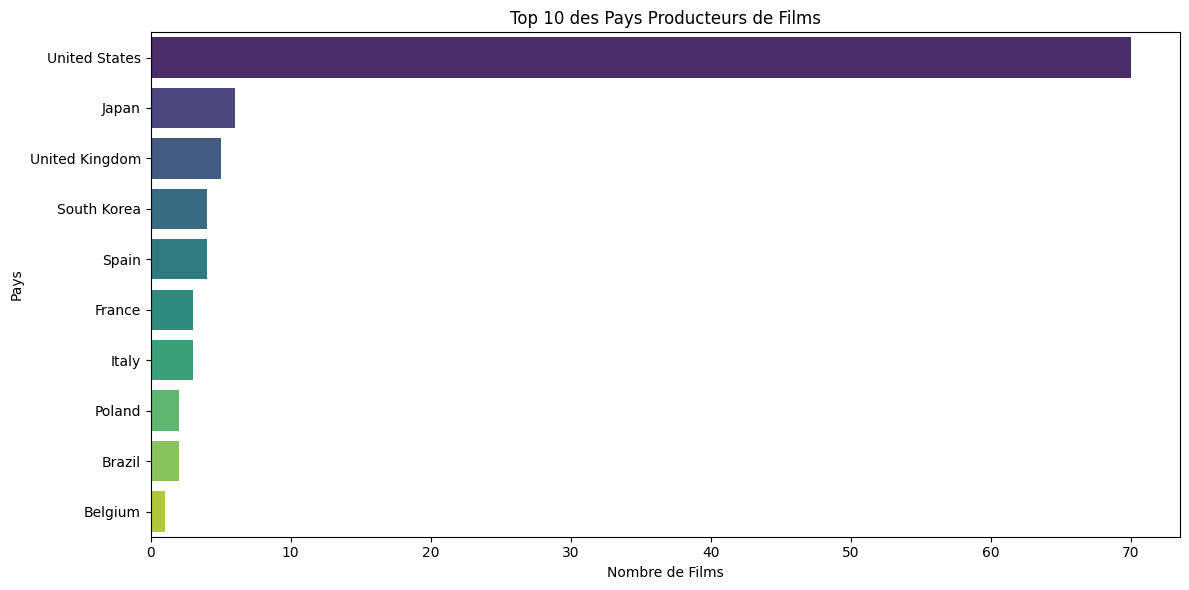

/var/folders/y0/mt7x3y915m5d6k6btz814d3h0000gn/T/ipykernel_24746/3183724632.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genres_df.head(10), x='Count', y='Genre', palette='viridis')


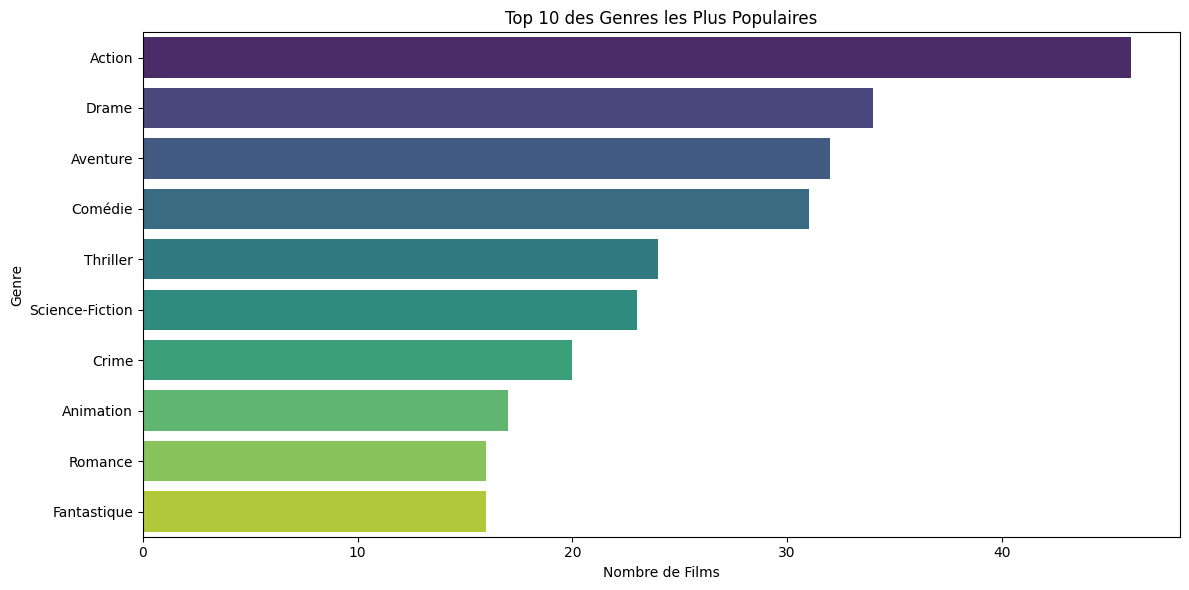

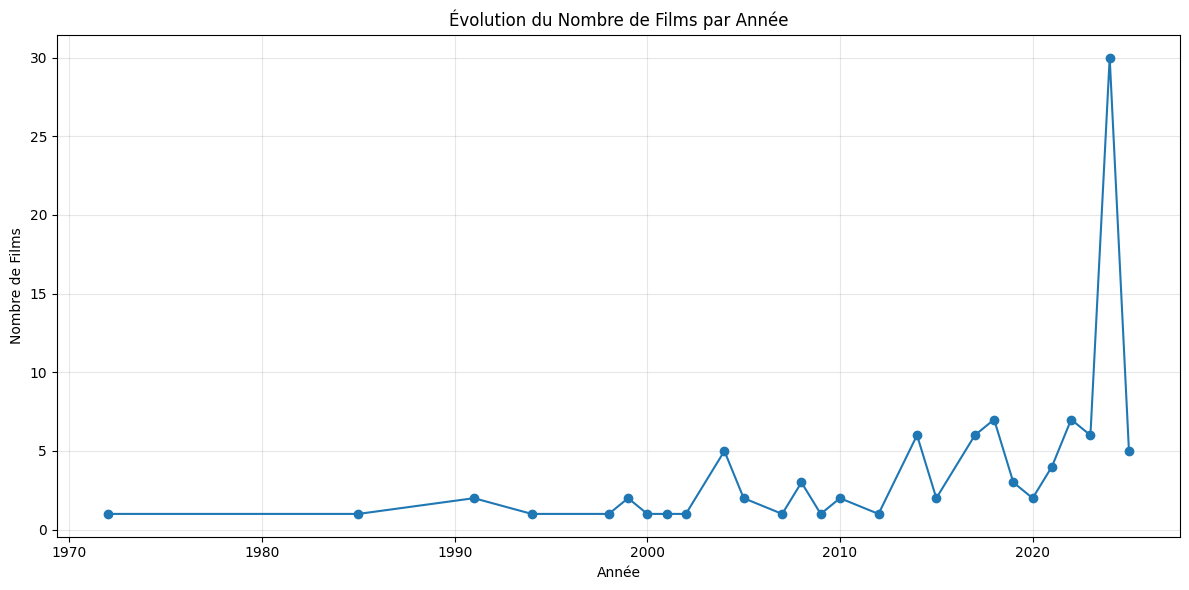

/var/folders/y0/mt7x3y915m5d6k6btz814d3h0000gn/T/ipykernel_24746/3183724632.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_ratings['mean'].head(10).values,


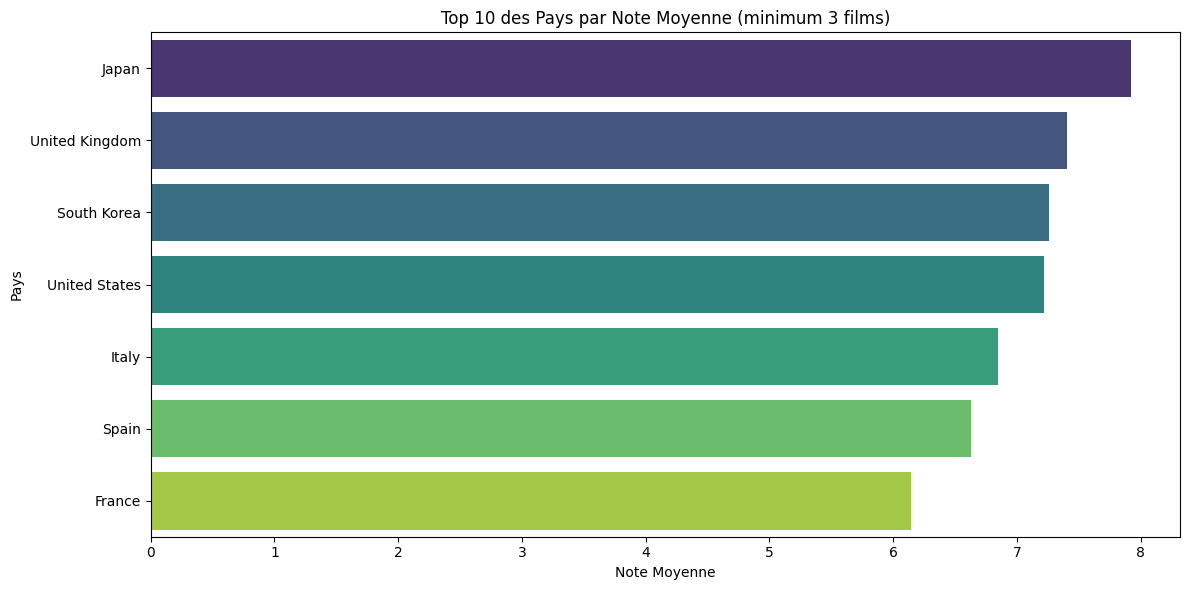

/var/folders/y0/mt7x3y915m5d6k6btz814d3h0000gn/T/ipykernel_24746/3183724632.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_ratings_df.head(10),


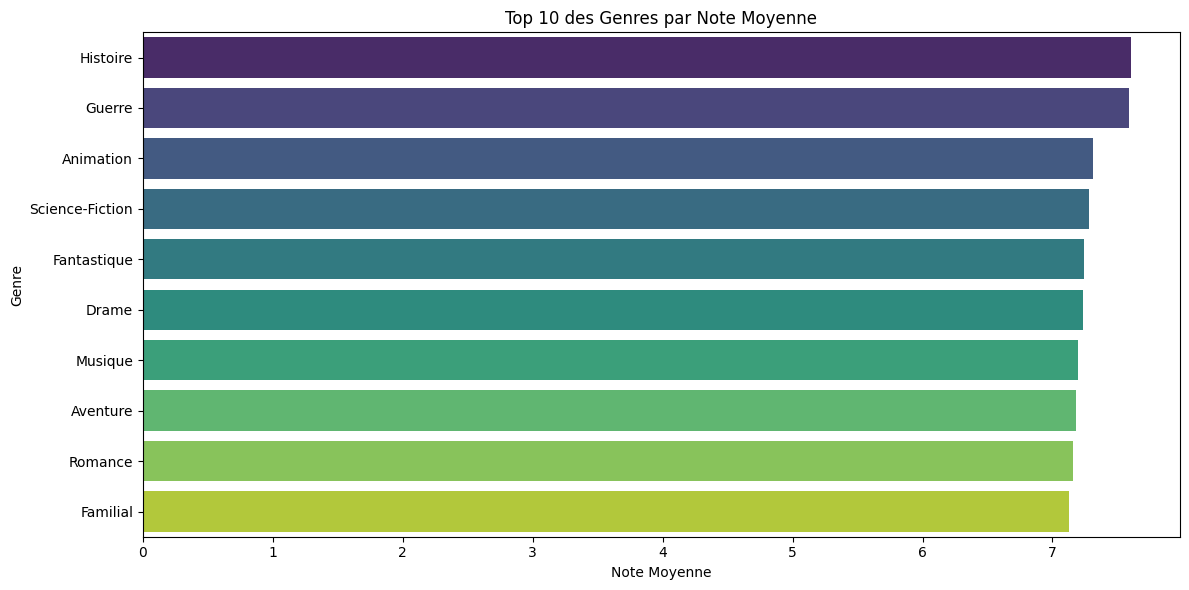

In [113]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class MovieAnalyzer:
    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file)
        # Conversion de la date en format datetime
        self.df['release_date'] = pd.to_datetime(self.df['release_date'])
        self.df['year'] = self.df['release_date'].dt.year
    
    def count_countries(self, df, column_name):
        # Split multi-country entries into individual countries
        country_names_split = df[column_name].str.split(',\s*')
        # Flatten the list of lists and count each country
        countries_flat = [country for sublist in country_names_split for country in sublist]
        # Count occurrences of each country
        country_counts = pd.Series(countries_flat).value_counts()

        return country_counts

    def analyze_countries(self):
        """1. Analyse de la répartition des films par pays"""
        # Normalisation des pays (gestion des co-productions)
        #country_counts = self.df['country_name'].value_counts()
        country_counts = self.count_countries(self.df, 'country_name')
        
        plt.figure(figsize=(12, 6))
        sns.barplot(x=country_counts.head(10).values, 
                   y=country_counts.head(10).index,
                   palette='viridis')
        plt.title('Top 10 des Pays Producteurs de Films')
        plt.xlabel('Nombre de Films')
        plt.ylabel('Pays')
        plt.tight_layout()
        plt.show()

        return country_counts

    def analyze_genres(self):
        """2. Analyse des genres de films"""
        # Séparation des genres multiples et comptage
        genres = {}
        for _, row in self.df.iterrows():
            if pd.notna(row['genre']):
                for genre in row['genre'].split(', '):
                    genres[genre] = genres.get(genre, 0) + 1

        genres_df = pd.DataFrame(list(genres.items()), 
                               columns=['Genre', 'Count']).sort_values('Count', 
                                                                     ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(data=genres_df.head(10), x='Count', y='Genre', palette='viridis')
        plt.title('Top 10 des Genres les Plus Populaires')
        plt.xlabel('Nombre de Films')
        plt.ylabel('Genre')
        plt.tight_layout()
        plt.show()

        return genres_df

    def analyze_time_evolution(self):
        """3. Évolution des sorties dans le temps"""
        yearly_counts = self.df['year'].value_counts().sort_index()

        plt.figure(figsize=(12, 6))
        yearly_counts.plot(kind='line', marker='o')
        plt.title('Évolution du Nombre de Films par Année')
        plt.xlabel('Année')
        plt.ylabel('Nombre de Films')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        return yearly_counts

    def analyze_ratings(self):
        """4. Analyse des notes moyennes"""
        # Notes moyennes par pays
        country_ratings = self.df.groupby('country_name')['rating'].agg(['mean', 'count'])
        country_ratings = country_ratings[country_ratings['count'] >= 3]  # Filtrer les pays avec au moins 3 films
        country_ratings = country_ratings.sort_values('mean', ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=country_ratings['mean'].head(10).values,
                   y=country_ratings.head(10).index,
                   palette='viridis')
        plt.title('Top 10 des Pays par Note Moyenne (minimum 3 films)')
        plt.xlabel('Note Moyenne')
        plt.ylabel('Pays')
        plt.tight_layout()
        plt.show()

        # Notes moyennes par genre
        genre_ratings = {}
        for _, row in self.df.iterrows():
            if pd.notna(row['genre']):
                for genre in row['genre'].split(', '):
                    if genre not in genre_ratings:
                        genre_ratings[genre] = {'total': 0, 'count': 0}
                    genre_ratings[genre]['total'] += row['rating']
                    genre_ratings[genre]['count'] += 1

        genre_avg_ratings = {genre: data['total']/data['count'] 
                           for genre, data in genre_ratings.items()}
        genre_ratings_df = pd.DataFrame(list(genre_avg_ratings.items()),
                                      columns=['Genre', 'Average_Rating'])
        genre_ratings_df = genre_ratings_df.sort_values('Average_Rating',
                                                       ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(data=genre_ratings_df.head(10),
                   x='Average_Rating',
                   y='Genre',
                   palette='viridis')
        plt.title('Top 10 des Genres par Note Moyenne')
        plt.xlabel('Note Moyenne')
        plt.ylabel('Genre')
        plt.tight_layout()
        plt.show()

        return country_ratings, genre_ratings_df

    def generate_complete_report(self):
        """Génère un rapport complet avec toutes les analyses"""
        country_data = self.analyze_countries()
        genre_data = self.analyze_genres()
        time_data = self.analyze_time_evolution()
        rating_country_data, rating_genre_data = self.analyze_ratings()

        report = {
            'country_distribution': country_data.to_dict(),
            'genre_distribution': genre_data.to_dict('records'),
            'time_evolution': time_data.to_dict(),
            'ratings': {
                'by_country': rating_country_data.to_dict('index'),
                'by_genre': rating_genre_data.to_dict('records')
            }
        }

        return report

# Utilisation de la classe
analyzer = MovieAnalyzer('test.csv')
report = analyzer.generate_complete_report()

In [86]:
df_series['country_name'].value_counts()

country_name
United States                    55
Japan                            24
South Korea                       9
United Kingdom                    6
Colombia                          3
Canada                            1
France                            1
France, Switzerland               1
Spain                             1
Poland                            1
Spain, United Kingdom             1
United Kingdom, United States     1
China                             1
Canada, France, United States     1
Name: count, dtype: int64

In [90]:
df_movies['country_name'].value_counts()

country_name
United States                                   66
Japan                                            6
South Korea                                      4
Spain                                            4
France                                           3
United Kingdom                                   3
Italy                                            3
Poland                                           2
Brazil                                           2
Indonesia                                        1
United States, United Kingdom                    1
Germany                                          1
Lebanon, United Arab Emirates, United States     1
India                                            1
Thailand                                         1
Philippines                                      1
United Kingdom, United States                    1
Belgium                                          1
Norway                                           1
United States, Can

In [16]:
def countData(df, column_name):
    # Split multi-data entries into individual data
    count_names_split = df[column_name].str.split(',\s*')
    # Flatten the list of lists and count each data
    count_flat = [dt for sublist in count_names_split for dt in sublist]
    # Count occurrences of each data
    data_counts = pd.Series(count_flat).value_counts()

    return data_counts

def explosedData(df, column_name):
    # Séparer les pays multiples dans la colonne 'country_name'
    df[column_name] = df[column_name].str.split(',\s*')

    # Exploser pour avoir une ligne par pays
    df_exploded = df.explode(column_name)
    
    return df_exploded

In [194]:
tst = df_movies.copy()
tst['release_date'] = pd.to_datetime(tst['release_date'])
tst['year'] = tst['release_date'].dt.year

In [195]:
tst['year'].value_counts().sort_index()

year
1972     1
1985     1
1991     2
1994     1
1998     1
1999     2
2000     1
2001     1
2002     1
2004     5
2005     2
2007     1
2008     3
2009     1
2010     2
2012     1
2014     6
2015     2
2017     6
2018     7
2019     3
2020     2
2021     4
2022     7
2023     6
2024    30
2025     5
Name: count, dtype: int64

In [196]:
# Répartitions des films par pays
country_counts_movies = countData(df_movies, 'country_name')
# Analyses des genres de films
genres_counts_movies = countData(df_movies, 'genre')
# Sorties des films dans le temps
yearly_counts_movies = tst['year'].value_counts().sort_index()
# Note moyennes par pays
df_movies_exploded = explosedData(df_movies, 'country_name')
country_ratings_movies = df_movies_exploded.groupby('country_name')['rating'].agg(['mean', 'count'])
country_ratings_movies = country_ratings_movies[country_ratings_movies['count'] >= 3]
country_ratings_movies = country_ratings_movies.sort_values('mean', ascending=False)
# Note moyesnnes par genres
df_genre_movie_explosed = explosedData(df_movies, 'genre')
genre_avg_ratings_movies = df_genre_movie_explosed.groupby('genre')['rating'].agg(['mean', 'count'])
genre_avg_ratings_movies = genre_avg_ratings_movies[genre_avg_ratings_movies['count'] >= 3]
genre_avg_ratings_movies = genre_avg_ratings_movies.sort_values('mean', ascending=False)


In [197]:
genre_avg_ratings_movies

,mean,count
genre,,
Histoire,7.601667,6
Guerre,7.589800,5
Animation,7.310176,17
Science-Fiction,7.282826,23
Fantastique,7.243375,16
Drame,7.237588,34
Aventure,7.181438,32
Romance,7.160625,16
Familial,7.125267,15


In [185]:
country_ratings_movies

,mean,count
country_name,,
Japan,7.921833,6
United Kingdom,7.447400,5
South Korea,7.256500,4
United States,7.188557,70
Italy,6.850667,3
Spain,6.630250,4
France,6.143667,3


In [146]:
genres_df = pd.DataFrame(list(genres_counts_movies.items()), columns=["Genre", "Count"]) \
    .loc[lambda df: df['Genre'].notna() & (df['Genre'] != '')] \
    .sort_values('Count', ascending=False)

In [147]:
genres_df

,Genre,Count
0,Action,46
1,Drame,34
2,Aventure,32
3,Comédie,31
4,Thriller,24
5,Science-Fiction,23
6,Crime,20
7,Animation,17
9,Fantastique,16
8,Romance,16


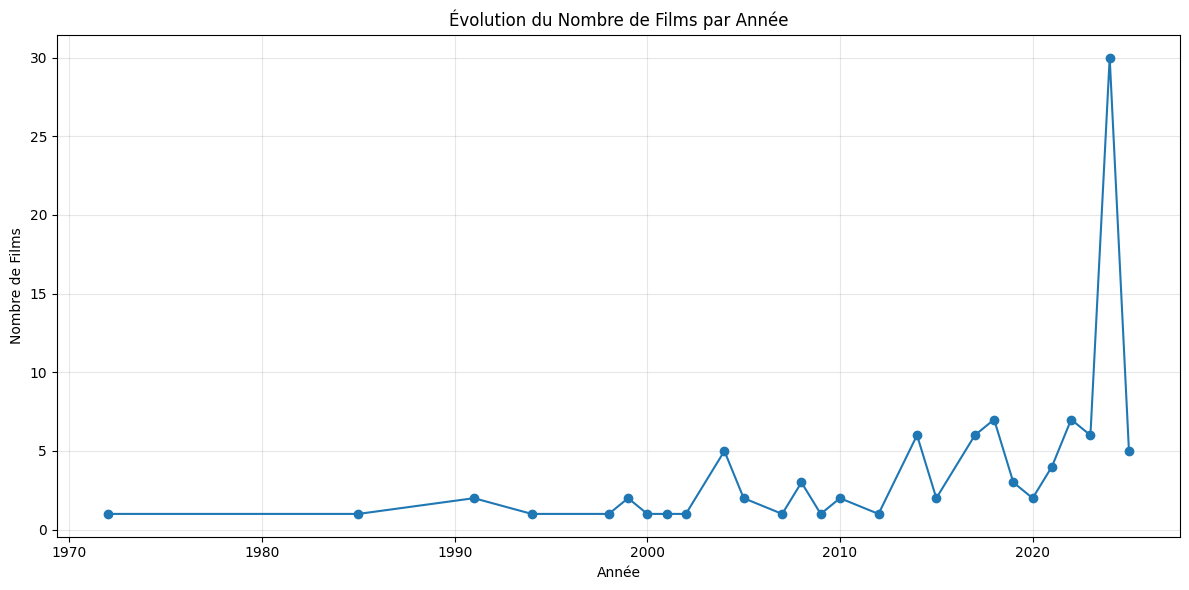

In [164]:
plt.figure(figsize=(12, 6))
yearly_counts_movies.plot(kind='line', marker='o')
plt.title('Évolution du Nombre de Films par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Films')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [151]:
genres_counts_movies.

Action             46
Drame              34
Aventure           32
Comédie            31
Thriller           24
Science-Fiction    23
Crime              20
Animation          17
Romance            16
Fantastique        16
Familial           15
Histoire            6
Guerre              5
Horreur             5
Mystère             4
                    1
Musique             1
Documentaire        1
Name: count, dtype: int64

In [ ]:
cleaned_genres_counts = {k.strip(): v for k, v in genres_counts_movies.items() if k.strip() and pd.notna(k)} = {k.strip(): v for k, v in genres_counts_movies.items() if k.strip() and pd.notna(k)}

In [155]:
cleaned_genres_counts

{'Action': 46,
 'Drame': 34,
 'Aventure': 32,
 'Comédie': 31,
 'Thriller': 24,
 'Science-Fiction': 23,
 'Crime': 20,
 'Animation': 17,
 'Romance': 16,
 'Fantastique': 16,
 'Familial': 15,
 'Histoire': 6,
 'Guerre': 5,
 'Horreur': 5,
 'Mystère': 4,
 'Musique': 1,
 'Documentaire': 1}

In [156]:
genres_df = pd.DataFrame(list(cleaned_genres_counts.items()), columns=["Genre", "Count"]).sort_values('Count', ascending=False)


In [157]:
genres_df

,Genre,Count
0,Action,46
1,Drame,34
2,Aventure,32
3,Comédie,31
4,Thriller,24
5,Science-Fiction,23
6,Crime,20
7,Animation,17
9,Fantastique,16
8,Romance,16
